In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
diamonds_train = pd.read_csv('outputs/df_train.csv')
diamonds_train_price = pd.read_csv('outputs/df_train_price.csv')
diamonds_predict=pd.read_csv('outputs/df_test.csv')
submit=pd.read_csv('inputs/sample_submission.csv')

In [3]:
diamonds_train.head()

,carat,cut_numeric,color_numeric,clarity_numeric,depth,table,x,y,z
0,-1.051355,-0.810564,0.352161,-0.033632,0.736126,-0.650176,-1.283716,-1.236438,-1.180531
1,-0.966764,0.982588,0.940769,-0.641579,0.596363,-1.097476,-1.132102,-1.080061,-1.039596
2,-0.839879,-0.810564,1.529377,-0.641579,-1.010919,2.033618,-0.918059,-0.854183,-0.969129
3,-0.839879,0.086012,-0.825055,0.574315,0.037308,0.781181,-0.900222,-0.862870,-0.870475
4,0.217504,-0.810564,1.529377,-0.641579,-0.521746,2.480917,0.330526,0.344710,0.271096


In [4]:
diamonds_predict.head()

,carat,cut_numeric,color_numeric,clarity_numeric,depth,table,x,y,z
0,3.267015,0.978152,-1.416151,-1.232414,-0.666318,-1.554540,2.620734,2.539800,2.446736
1,2.596725,0.978152,-0.830504,-1.232414,0.168508,-0.658049,2.175567,2.234832,2.230593
2,-0.608098,0.978152,-1.416151,-0.627731,-0.040199,-1.554540,-0.495431,-0.491942,-0.492811
3,-1.047976,0.978152,-1.416151,-0.627731,-0.318474,-0.658049,-1.261117,-1.263332,-1.285335
4,0.334497,-2.592365,-0.830504,-0.023048,4.899190,-0.658049,0.332578,0.216660,0.890505


# Split train and test

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diamonds_train, diamonds_train_price, test_size=0.01)

In [6]:
X_train.head()

,carat,cut_numeric,color_numeric,clarity_numeric,depth,table,x,y,z
8737,1.507510,-1.707140,-1.413663,-0.641579,1.365062,1.586319,1.266965,1.196098,1.412667
5714,-0.712993,0.086012,-0.236447,1.182263,-0.312101,1.139020,-0.704015,-0.628304,-0.687260
31323,0.682752,0.982588,1.529377,-1.249527,0.596363,-0.202877,0.785368,0.796467,0.863022
9009,-0.861026,0.982588,0.352161,0.574315,0.386717,-0.202877,-0.962651,-0.906308,-0.884568
4671,-0.818731,-0.810564,-0.825055,-0.641579,1.085535,-0.650176,-0.882385,-0.888933,-0.771820


In [7]:
y_test.head()

,price
2275,2789
30136,1050
40346,2456
38176,3784
28575,2613


# tree model

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import NearestCentroid

In [9]:
tree_model = DecisionTreeClassifier()

In [10]:
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
from sklearn.metrics import r2_score
y_pred_tree = tree_model.predict(X_test)
#r2_score(y_test, y_pred_tree)

In [12]:
y_test_tree = y_test.copy()
y_test_tree['y']= y_pred_tree

In [13]:
y_test_tree

,price,y
2275,2789,2668
30136,1050,909
40346,2456,2708
38176,3784,2045
28575,2613,2735
...,...,...
28943,5699,5474
3571,605,605
25298,657,898
28252,8529,12109


In [14]:
y_test_tree['Price-y'] = abs(y_test_tree['price']- y_test_tree['y'])
y_test_tree.describe()

,price,y,Price-y
count,405.000000,405.000000,405.000000
mean,4198.170370,4205.970370,463.913580
std,4073.414225,4055.752917,815.314071
min,394.000000,373.000000,0.000000
25%,957.000000,970.000000,54.000000
50%,2765.000000,2679.000000,186.000000
75%,5864.000000,5963.000000,489.000000
max,18500.000000,18281.000000,6622.000000


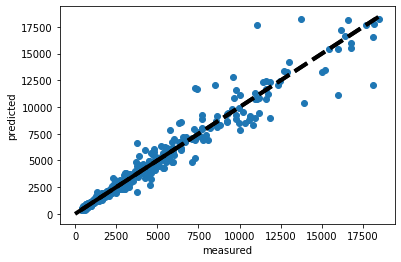

In [15]:
fig, ax = plt.subplots()
ax.scatter( y_test_tree['price'], y_test_tree['y'])
ax.plot([y_test_tree.min(), y_test_tree.max()], [y_test_tree.min(), y_test_tree.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
print( "Errore quadratico medio:% .2f" % mean_squared_error ( y_test_tree['price'], y_test_tree['y']))
print( 'R²:% .2f' % r2_score ( y_test_tree['price'], y_test_tree['y']))

Errore quadratico medio: 878311.52
R²: 0.95


In [ ]:
df_y.to_csv('predicion1.csv', index=False)